_Artificial Intelligence - The Final Project_

# Pump Impeller Quality Control Using CNN

### Group Members

| Full Name         | Student Number |
|-------------------|----------------|
| Hamed Aarab       | 9925003        |
| Fateme Khodabande | 9825011        |
| Rosha Moshtaghian | 9825080        |

### Used Data

The data we used are available on [Kaggle](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product).

### Project Description

This project is basically a classification problem. Since we are dealing with images, we have decided to solve it with a convolutional neural network due to its abilities in image processing.

### Let's Get Started

To get started, we create the following project structure:

```
quality_control/
├── data/
│   ├── train/
│   │   ├── defective/
│   │   └── non_defective/
│   └── test
│       ├── defective/
│       └── non_defective/
└── quality_control.ipynb
```
Then, we load the images of defective and non-defective pump impellers in their respective folders. Note that our data were split into train and validation sections by default.


### Prerequisites

The libraries we need are:

- Tensorflow for defining the CNN model.
- Numpy for transforming arrays.
- Matplotlib for visualizing pump impeller images.
- VisualKeras for visualizing our model.


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import visualkeras as vk


### Data Visualization

First, we define a function for loading images in the gray-scale mode.

Then, we define another function to get an image and visualize it using Matplotlib. This function transforms the image into an array and rescales its values to `[0, 1]`.


In [6]:
def get_image(path):
    return tf.keras.preprocessing.image.load_img(path, color_mode = 'grayscale')

def visualize_image(image):
    plt.figure()

    plt.imshow(
        tf.keras.preprocessing.image.img_to_array(image) / 255,
        cmap = 'gray',
    )

    plt.show()


#### Defective Image Example

Here's an example of a defective pump impeller.


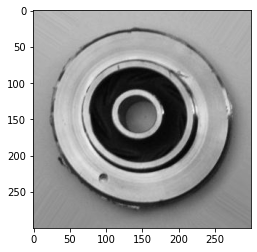

In [7]:
defective_image_example = get_image('./data/test/defective/cast_def_0_108.jpeg')

visualize_image(defective_image_example)


#### Non-Defective Image Example

And here's an example image of a non-defective pump impeller.


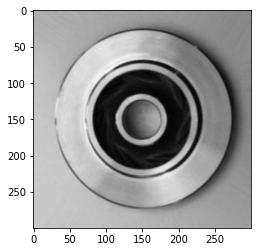

In [8]:
non_defective_image_example = get_image('./data/test/non_defective/cast_ok_0_1026.jpeg')

visualize_image(non_defective_image_example)


### Data Preprocessing

Now, we need to pre-process our data by loading and rescaling the train data and the test data separately.
To improve our model's processing abilities, we randomly zoom and shear the train data in order to simulate seeing objects from different angles and distances.


In [9]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    zoom_range = 0.2,
    shear_range = 0.2,
).flow_from_directory(
    './data/train',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (64, 64),
    color_mode = 'grayscale',
)

test_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
).flow_from_directory(
    './data/test',
    class_mode = 'binary',
    batch_size = 8,
    target_size = (64, 64),
    color_mode = 'grayscale',
)


Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


### Defining The CNN Model

Our CNN model is going to have two series of convolution and max pooling layers. Then, we flatten the output and pass it to an MLP with two hidden layers.

Finally, we compile our model with the adam optimizer and binary cross entropy loss function.


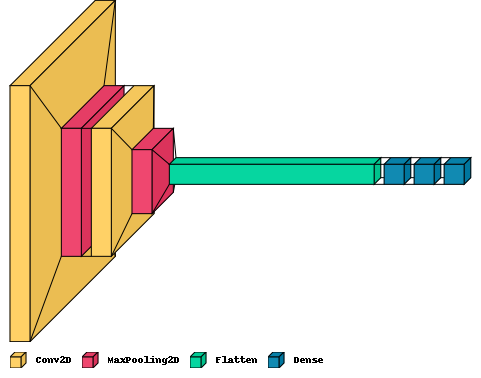

In [10]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D(
        filters = 8,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (64, 64, 1),
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

model.add(
    tf.keras.layers.Conv2D(
        filters = 8,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
    )
)

model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units = 16, activation = 'tanh'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy'],
)

vk.layered_view(model, legend = True)

### Training The CNN Model

Here, we train our model with 10 epochs and save the one with the highest validation accuracy.


In [11]:
history = model.fit(train_data, validation_data = test_data, epochs = 20)

model.save('classifier_model.h5')


Epoch 1/20
830/830 [==============================] - 59s 69ms/step - loss: 0.5668 - binary_accuracy: 0.6875 - val_loss: 0.5080 - val_binary_accuracy: 0.7483
Epoch 2/20
830/830 [==============================] - 11s 13ms/step - loss: 0.4131 - binary_accuracy: 0.8090 - val_loss: 1.0152 - val_binary_accuracy: 0.4909
Epoch 3/20
830/830 [==============================] - 11s 14ms/step - loss: 0.3325 - binary_accuracy: 0.8488 - val_loss: 0.2705 - val_binary_accuracy: 0.8657
Epoch 4/20
830/830 [==============================] - 11s 13ms/step - loss: 0.2706 - binary_accuracy: 0.8817 - val_loss: 0.3032 - val_binary_accuracy: 0.8615
Epoch 5/20
830/830 [==============================] - 11s 13ms/step - loss: 0.2282 - binary_accuracy: 0.9023 - val_loss: 0.4180 - val_binary_accuracy: 0.8406
Epoch 6/20
830/830 [==============================] - 11s 13ms/step - loss: 0.1824 - binary_accuracy: 0.9282 - val_loss: 0.3685 - val_binary_accuracy: 0.8727
Epoch 7/20
830/830 [==============================] 

### Plotting The Model's Binary Accuracy And Loss

Here, we plot our model's loss and accuracy over all of the epochs.


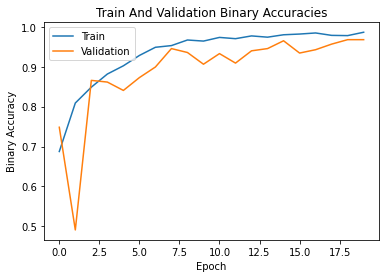

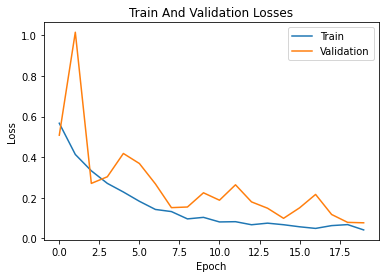

In [12]:
plt.figure()

plt.title('Train And Validation Binary Accuracies')

plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])

plt.xlabel('Epoch')
plt.ylabel('Binary Accuracy')

plt.legend(['Train', 'Validation'], loc = 'upper left')

plt.figure()

plt.title('Train And Validation Losses')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(['Train', 'Validation'], loc = 'upper right')


### Testing The CNN Model

Let's test our model with the example images of defective and non-defective pump impellers.

First, we define a `predict` function to make things easier.


In [13]:
def predict(image):
    result = model.predict(
        np.expand_dims(
            tf.keras.preprocessing.image.img_to_array(
                image.resize((64, 64)),          
            ) / 255,
            axis = 0
        )
    )

    if result[0][0] <= 0.5:
        print(f'Defective (Prediction Value: {result[0][0]})')
    else:
        print(f'Non-Defective (Prediction Value: {result[0][0]})')


#### Testing The Defective Image Example


In [14]:
predict(defective_image_example)


1/1 [==============================] - 0s 97ms/step
Defective (Prediction Value: 9.853595202002907e-07)


#### Testing The Non-Defective Image Example


In [15]:
predict(non_defective_image_example)


1/1 [==============================] - 0s 18ms/step
Non-Defective (Prediction Value: 0.9985570311546326)


### Conclusion

Our CNN model can classify images of pump impeller with an accuracy of `~96%`.
